# Explore Exercises

In [1]:
# tabular data
import pandas as pd
import numpy as np

# data visuals
import matplotlib.pyplot as plt
import seaborn as sns

# statistical testing
from scipy.stats import pearsonr, spearmanr

# data wrangling and import
from wrangle import wrangle_zillow

#### As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

#### Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
# Get train, validate, and test data sets 
train, validate, test = wrangle_zillow()

#### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [35]:
# creating a function to sepearate categorical variables and numerical variables
def determine_variable_type(train, n_unique = 10):
    '''
    Arguments: a train dataset
    Actions:
        1. Assigns columns names to categorical columns list or numerical columns list
            a. Categorical columns: the datatype is object or there are less than 10 unique values 
            b. Numerical columns: the datatype is not an object and thhere are 10 or more unique values
    Returns: categorical_column_list, numerical_column_list
    '''
    # list comprehension that determines a col is  categorical if the data type is an object or there are less than 10 values
    cat_col = [col for col in train if train[col].dtype == 'O' or train[col].nunique() < n_unique]
    
    # list comprehension that complements the above
    num_col = [col for col in train if train[col].dtype != 'O' and train[col].nunique() >= n_unique]
    
    # full list of variables to explore
    explore_col = cat_col + num_col
    
    return explore_col, cat_col, num_col

In [13]:
def univariate_stats(train):
    '''
    Parameters: *only* a train dataset as an argument
    Actions:
        1. Creates univariate datavisuals for all variables in the dataset
        2. Displays summary statistics for variables with more than 5 unique values
    Returns: prints summary stats and graphs to understand the data
    Modules: searborn, matplotlib.pyplot, 
    '''
    explore_col, cat_col, num_col = determine_variable_type(train)
    
    for col in explore_col:
        if col in cat_col:
            sns.countplot(data=train, x=col,)
            plt.title(f'Barplot of {col.capitalize()}')
            plt.show()
            print(f'Value Frequency of {col.capitalize()}')
            print(pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
        elif col in num_col:
            plt.subplot(121)
            plt.hist(train[col])
            plt.title(f'Histogram of {col.capitalize()}')
            
            plt.subplot(122)
            sns.boxplot(data=train, x=col)
            plt.title(f'Boxplot of {col.capitalize()}')
            plt.show()
            
            print(f'Summary statistics of {col.capitalize()}:\n')
            print(train[col].describe())
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
    return

In [ ]:
def bivariate_stats(train, focus = 'all'):
    '''
    
    '''
    explore_col, cat_col, num_col = determine_variable_type(train)
    
    target = 'churn'
    
    if focus == 'all':
        for col in cat_col:
            if col != target:
                sns.barplot(data=train,
                            x=col, 
                            y=target)
                plt.axhline(train[target].mean(), c='r')
                plt.title(f'{target.capitalize()} by {col.capitalize()} Barplot')
                plt.show()

        for col in num_col:
            if col != target:
                plt.subplot(121)
                sns.barplot(data=train,
                           x=target,
                           y=col)
                plt.axhline(train[col].mean(), c='r')

                plt.subplot(122)
                sns.boxplot(data=train,
                           x=target,
                           y=col)
                plt.axhline(train[col].mean(), c='r')
                plt.show()
    elif focus == 'cat':
        for col in cat_col:
            if col != target:
                sns.barplot(data=train,
                            x=col, 
                            y=target)
                plt.axhline(train[target].mean(), c='r')
                plt.title(f'{target.capitalize()} by {col.capitalize()} Barplot')
                plt.show()
    elif focus == 'num':
        for col in num_col:
            if col != target:
                plt.subplot(121)
                sns.barplot(data=train,
                           x=target,
                           y=col)
                plt.axhline(train[col].mean(), c='r')

                plt.subplot(122)
                sns.boxplot(data=train,
                           x=target,
                           y=col)
                plt.axhline(train[col].mean(), c='r')
                plt.show()
    return

In [3]:
# check out data
train.head()

,beds,baths,square_feet,tax_value,year_built,tax_amount,fips
9100,4.0,3.0,3190.0,815334.0,1979.0,8698.22,6059.0
1246696,4.0,2.0,1292.0,270136.0,1965.0,3174.66,6059.0
485071,3.0,2.0,1712.0,133228.0,1976.0,1604.10,6111.0
438063,4.0,3.0,2565.0,703483.0,1988.0,8346.21,6037.0
1528007,4.0,2.5,2463.0,647208.0,1966.0,6615.28,6059.0


In [4]:
# what variables do I need for the exploration? What is the target? What do I need to do?

# Establish target
target = 'tax_value'

In [6]:
# create lists of column names for each type of vairable
explore_col, cat_col, num_col = determine_variable_type(train)

In [7]:
# checking the numerical columns
train[num_col]

,beds,baths,square_feet,tax_value,tax_amount
9100,4.0,3.0,3190.0,815334.0,8698.22
1246696,4.0,2.0,1292.0,270136.0,3174.66
485071,3.0,2.0,1712.0,133228.0,1604.10
438063,4.0,3.0,2565.0,703483.0,8346.21
1528007,4.0,2.5,2463.0,647208.0,6615.28
...,...,...,...,...,...
469465,3.0,2.0,1600.0,217147.0,2921.35
1965407,4.0,2.0,1856.0,343168.0,4424.20
1166639,3.0,1.0,1388.0,807742.0,9749.18
108966,3.0,2.0,1050.0,320000.0,3937.12


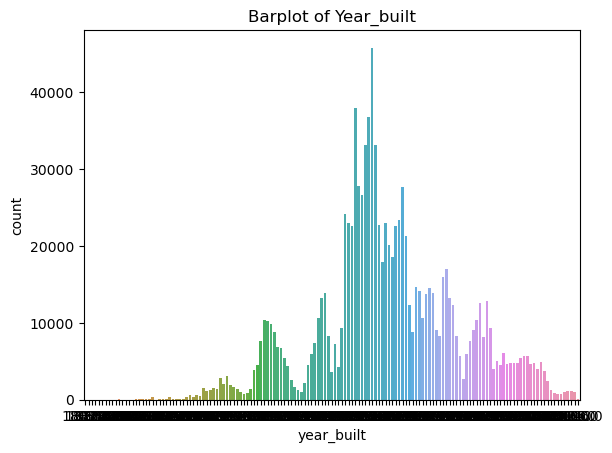

Value Frequency of Year_built
        year_built    year_built
1955.0       45842  4.286021e-02
1950.0       37964  3.549464e-02
1954.0       36859  3.446151e-02
1953.0       33202  3.104238e-02
1956.0       33106  3.095263e-02
...            ...           ...
1870.0           1  9.349552e-07
1877.0           1  9.349552e-07
1883.0           1  9.349552e-07
1807.0           1  9.349552e-07
1879.0           1  9.349552e-07

[147 rows x 2 columns]


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




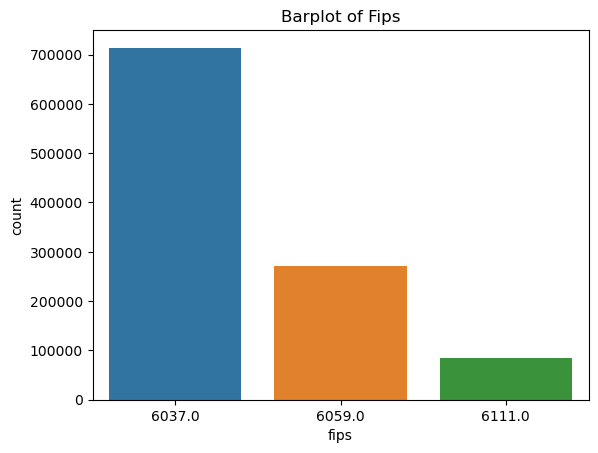

Value Frequency of Fips
          fips      fips
6037.0  713886  0.667451
6059.0  272067  0.254370
6111.0   83617  0.078178


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




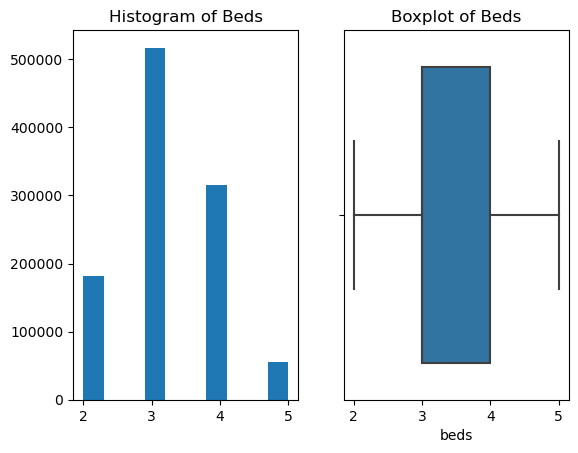

Summary statistics of Beds:

count    1.069570e+06
mean     3.228751e+00
std      7.870331e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: beds, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




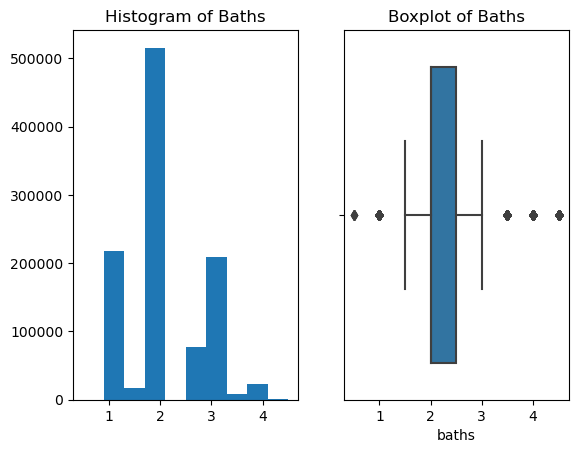

Summary statistics of Baths:

count    1.069570e+06
mean     2.079301e+00
std      7.266566e-01
min      5.000000e-01
25%      2.000000e+00
50%      2.000000e+00
75%      2.500000e+00
max      4.500000e+00
Name: baths, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




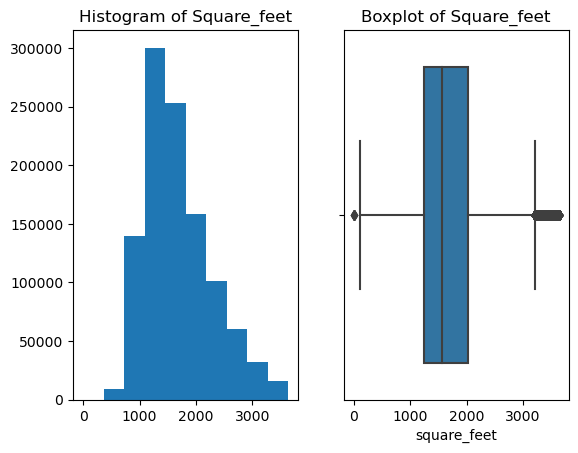

Summary statistics of Square_feet:

count    1.069570e+06
mean     1.683005e+03
std      5.946844e+02
min      2.000000e+00
25%      1.240000e+03
50%      1.563000e+03
75%      2.026000e+03
max      3.634000e+03
Name: square_feet, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




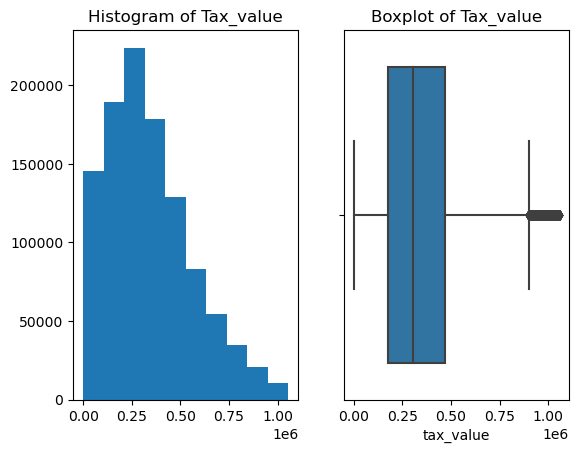

Summary statistics of Tax_value:

count    1.069570e+06
mean     3.425501e+05
std      2.161426e+05
min      2.200000e+01
25%      1.777352e+05
50%      3.041620e+05
75%      4.681050e+05
max      1.054000e+06
Name: tax_value, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




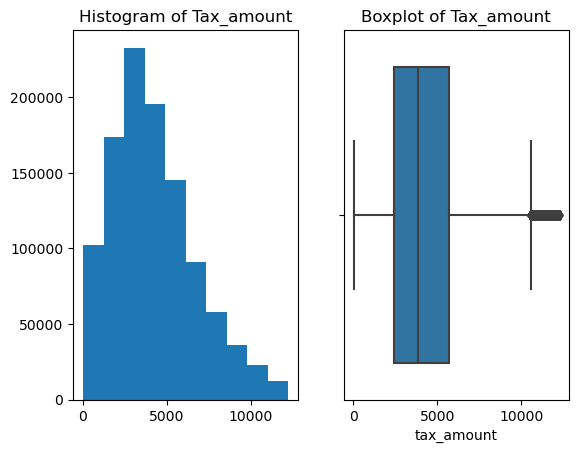

Summary statistics of Tax_amount:

count    1.069570e+06
mean     4.244629e+03
std      2.457428e+03
min      1.872000e+01
25%      2.412323e+03
50%      3.831200e+03
75%      5.670545e+03
max      1.223282e+04
Name: tax_amount, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




In [14]:
# checking for the distribution of the variables individually
univariate_stats(train)

**Takeaways:**
- Bathrooms and Bedrooms are not normally distributed
- Tax value, tax amount, and square feet are more normally distributed and right skewed

**Actions:**
- Something is telling me to use spearmans r correlation when analyzing these. I will use spearman's r and ask about this at a later time from the instructor

In [16]:
corr = train.corr(method='spearman')

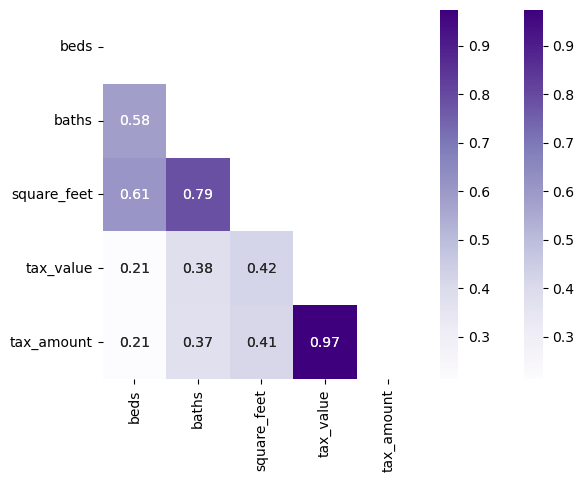

In [22]:
sns.heatmap(corr, 
            annot=True,
            cmap='Purples', 
            mask=np.triu(corr))

plt.show()

**Takeaways:**
* Tax value is most strongly associated with the tax amount at .97
* Bathrooms and sqaure feet have a higher correlation with each other and also have similar correlations to the tax value with squarefeet having the highest
* Bedrooms have the weakest correlation with the tax_value and tax_amount

**Actions:**
* I think squarefeet, bathrooms, and tax amount are the best options for features to use in the modeling phase it seems

In [36]:
def pair_plot(train, num_col):
    '''
    Arguments:train dataset
    Actions: plots each
    '''
    
    target = 'tax_value'
    
    for col in num_col:
        sns.lmplot(x=col, y=target, data=train, line_kws={'color': 'red'})
    plt.show()
    
    return


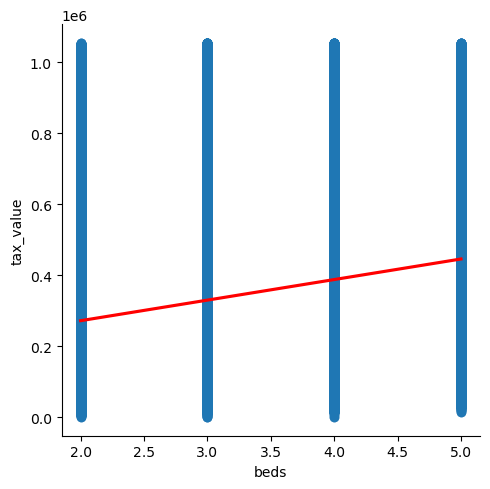

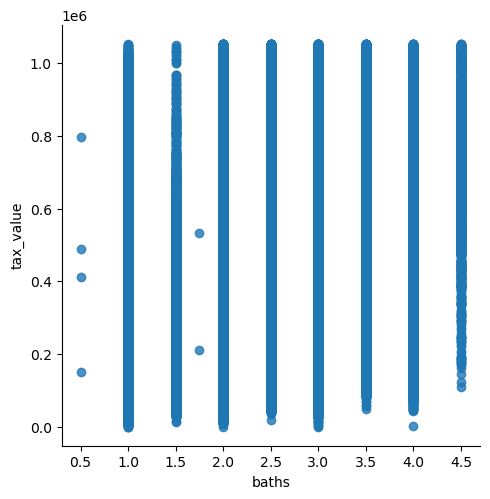

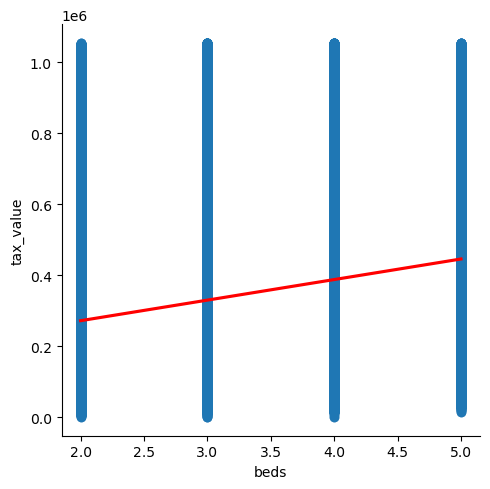

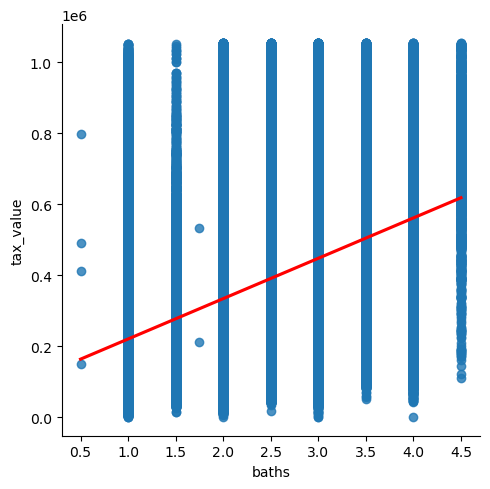

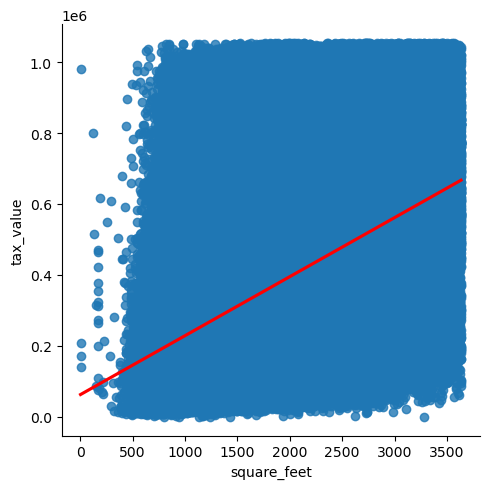

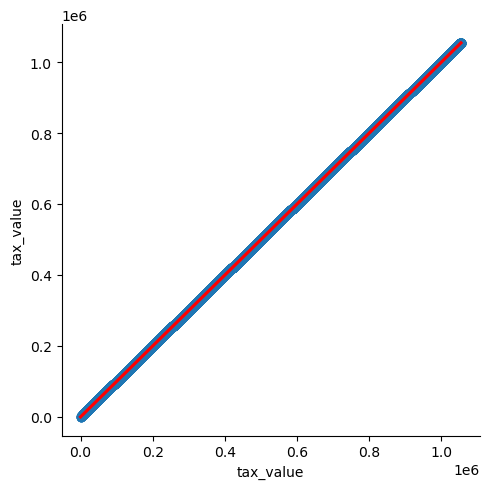

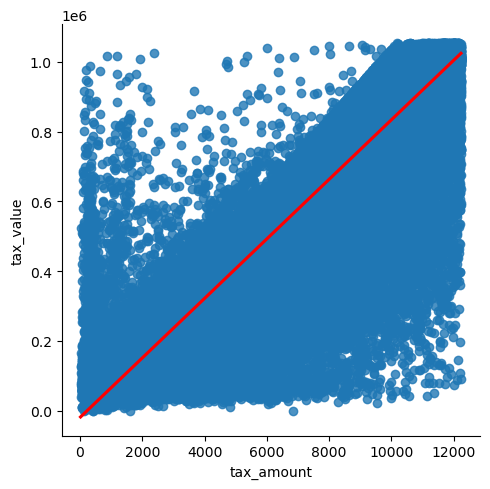

In [34]:
for col in num_col:
    sns.lmplot(x=col, y=target, data=train, line_kws={'color': 'red'})
plt.show()


#### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [48]:
# get categorical and numerical columns
ex, cat_cols, num_cols = determine_variable_type(train, n_unique=3)

In [ ]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, (num, cat) in enumerate(zip(num_cols, cat_cols)):
    print(i, num, cat)
    
    
    

In [47]:
for num in num_cols:
    for cat in cat_cols:
        sub_pl
        plt.subplot(131)
        sns.boxplot(x = num,
                   y = cat,
                   data=train)

        plt.subplot(132)
        sns.swarmplot(x = 'fips',
                   y = 'tax_value',
                   data=train)

        plt.subplot(133)
        sns.striplot(x = 'fips',
                   y = 'tax_value',
                   data=train)

        plt.show()

KeyboardInterrupt: 

**Takeaways:**
* Year built has many years, it may be useful to group them by decade for plotting
* I need to better understand the spearmans r and pearsons r. I think running throught the leson again will help kme better grasp the different things I need to grasp

**Actions:**
* Keep only the 

#### Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

#### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

#### Come up with some initial hypotheses based on your goal of predicting property value.

#### Visualize all combinations of variables in some way.

#### Run the appropriate statistical tests where needed.

#### What independent variables are correlated with the dependent variable, home value?

#### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

#### Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

#### Explore your dataset with any other visualizations you think will be helpful.

Bonus Exercise

In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.